# Segmentazione della clientela di un'azienda di servizi finanziari

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [ ]:
DATASET_URL = "https://proai-datasets.s3.eu-west-3.amazonaws.com/credit_card_customers.csv"

In [ ]:
df = pd.read_csv(DATASET_URL)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Ricaviamo delle prime informazioni riguardo la struttura del dataset, successivamente verifichiamo l'eventuale presenza di valori mancanti.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

La colonna "CREDIT_LIMIT" ha un solo valore mancante, mentre nella colonna "MINIMUM_PAYMENTS" ci sono 313 valori mancanti. Nel primo caso, trattandosi di un solo valore, possiamo rimuoverlo; nel secondo caso possiamo sostituire i valori mancanti con il valore medio.

In [ ]:
df = df.dropna(subset=['CREDIT_LIMIT'])

In [ ]:
mean_minimum_payments = round(df["MINIMUM_PAYMENTS"].mean(), 0)
mean_minimum_payments

864.0

In [ ]:
df["MINIMUM_PAYMENTS"].fillna(value=mean_minimum_payments, inplace=True)

In [ ]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,864.294277,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2330.700933,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,335.657631,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,864.000000,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Andiamo a normalizzare i dati per portare le features su una stessa scala di grandezza, per poter semplificare l'analisi.

In [ ]:
df_norm = df.copy()
features = df_norm.columns[1:]
df_norm[features] = (df_norm[features] - df_norm[features].min()) / (df_norm[features].max() - df_norm[features].min())
df_norm.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,C10002,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,C10003,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,C10004,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011308,0.000000,1.0
4,C10005,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


Andiamo a definire sia la funzione per il grafico della curva ssd per determinare il numero di cluster sia la funzione per costruire lo scatterplot.

In [ ]:
RANDOM_SEED = 1

def plot_ssd_curve(data):

  ssd = {}

  for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=RANDOM_SEED)
    kmeans.fit(X)
    ssd[k] = kmeans.inertia_

  plt.plot(list(ssd.keys()), list(ssd.values()), marker="o")
  plt.xlabel("Number of cluster", fontsize=14)
  plt.ylabel("Sum Squared Distance", fontsize=14)
  plt.show()

In [ ]:
def plot_cluster(model, data, axlabels=None):

  centers = model.cluster_centers_
  y_kmeans = model.predict(data)
  plt.figure(figsize=(10, 8))
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=y_kmeans, s=100, palette='mako')
  plt.scatter(centers[:,0], centers[:,1], c="orange", alpha=.7, s=250)

  if axlabels!=None:
    plt.xlabel(axlabels[0], fontsize=15)
    plt.ylabel(axlabels[1], fontsize=15)

  plt.show()

In [ ]:
# convertiamo i risultati in un DataFrame

def to_cluster(X):

  y_kmeans = kmeans.predict(X)
  df_result = pd.DataFrame({
      "Customer ID" : df['CUST_ID'],
      "Customer Group": y_kmeans
      })
  return df_result

# Iniziamo a dividere in cluster per le colonne "Balance" e "Purchases" e individuiamo il numero di cluster.

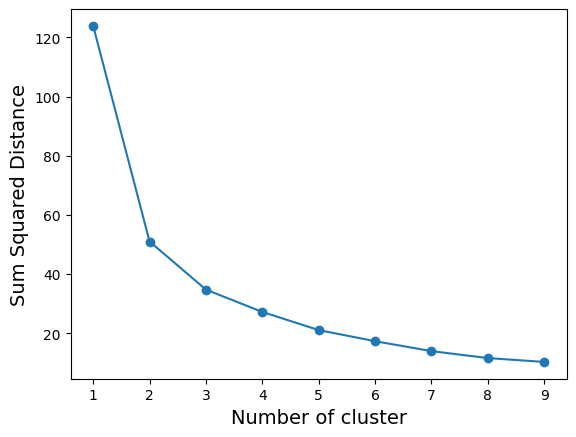

In [ ]:
X = df_norm[['BALANCE', 'PURCHASES']]. values
plot_ssd_curve(X)

Applichiamo il KMeans

In [ ]:
kmeans = KMeans(n_clusters=6, init="k-means++", random_state=RANDOM_SEED)
kmeans.fit(X)
kmeans.inertia_

17.313822168945038

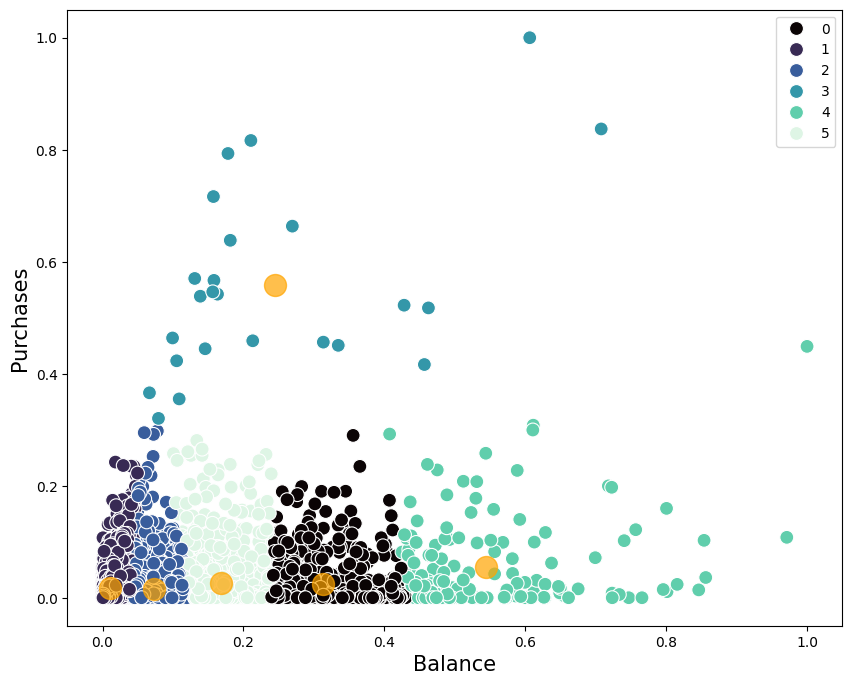

In [ ]:
plot_cluster(kmeans, X, axlabels=['Balance', 'Purchases'])

Osservando il grafico si può notare come il **cluster 4** ha un importo del saldo rimasto sul conto (valore di Balance) più alto rispetto agli altri, ma un numero basso di acquisti (valore di Purchases). Potrebbe essere vantaggioso indirizzare una campagna di marketing verso questi clienti, magari attraverso promozioni che possano incentivare gli acquisti.

# Consideriamo ora le variabili CREDIT_LIMIT e PAYMENTS

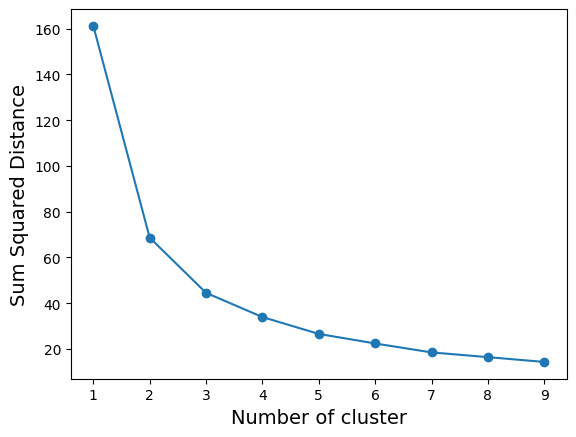

In [ ]:
X = df_norm[['CREDIT_LIMIT', 'PAYMENTS']].values
plot_ssd_curve(X)

In [ ]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=RANDOM_SEED)
kmeans.fit(X)
kmeans.inertia_

26.552297914471595

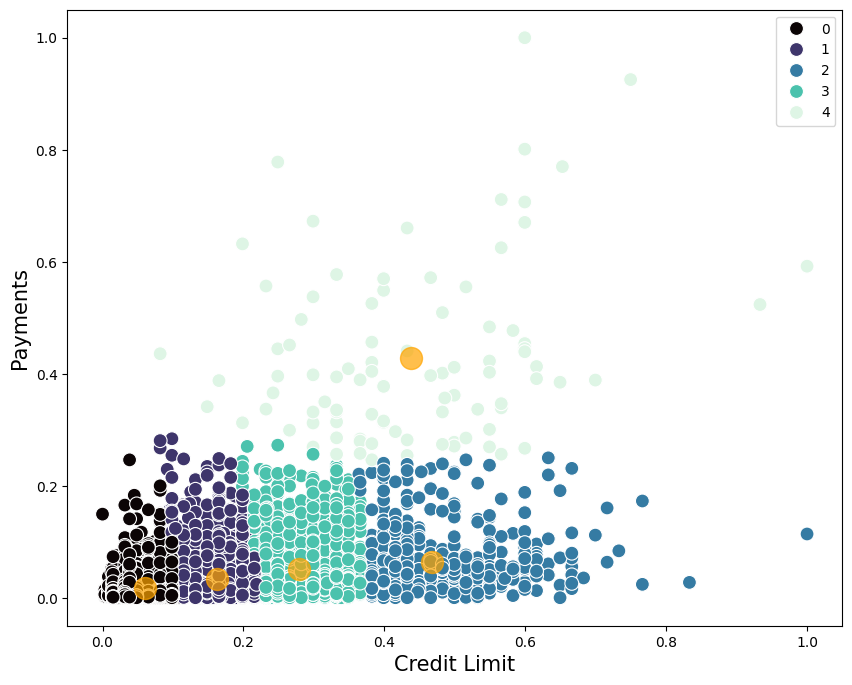

In [ ]:
plot_cluster(kmeans, X, axlabels=['Credit Limit', 'Payments'])

Nel grafico si nota come gli utenti del **cluster 2** hanno un limite più elevato della carta ma gli importi dei pagamenti sono piuttosto bassi: si potrebbe incentivare questi clienti ad effettuare pagamenti di importo superiore tramite sconti per l'uso della carta di credito o cashback su categorie di spesa di maggiore interesse.

Il **cluster 4**, invece, effettua pagamenti di importo più elevato: in tal caso si potrebbe incentivare la clientela a continuare ad utilizzare la carta di credito attraverso programmi fedeltà, comunicazione di offerte e vantaggi esclusivi tramite email, sms, notifiche di app, ecc.

Per i **cluster 0, 1, 3** la campagna di marketing dovrebbe incentivare i clienti ad aumentare sia il limite di credito che gli importi di acquisto con carta mediante piccoli sconti e offerte, cashback particolarmente vantaggiosi, campagne di benvenuto per i nuovi clienti, incentivi per pagamenti puntuali.

In [ ]:
df_cluster = to_cluster(X)
df_cluster.to_excel("payments_with_credit_limit.xlsx")

# Consideriamo PURCHASES_FREQUENCY e ONEOFF PURCHASES FREQUENCY

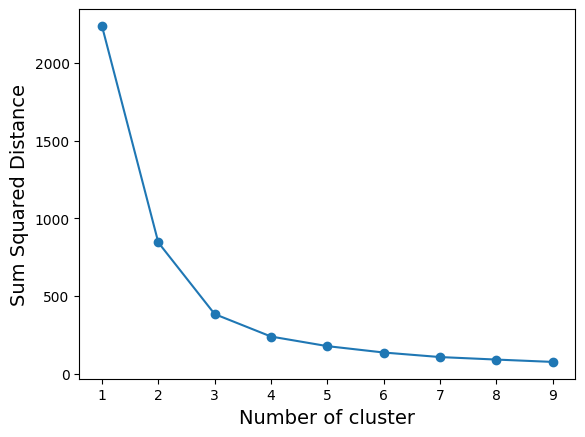

In [ ]:
X = df_norm[['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY']].values
plot_ssd_curve(X)

In [ ]:
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=RANDOM_SEED)
kmeans.fit(X)
kmeans.inertia_

238.78795308135125

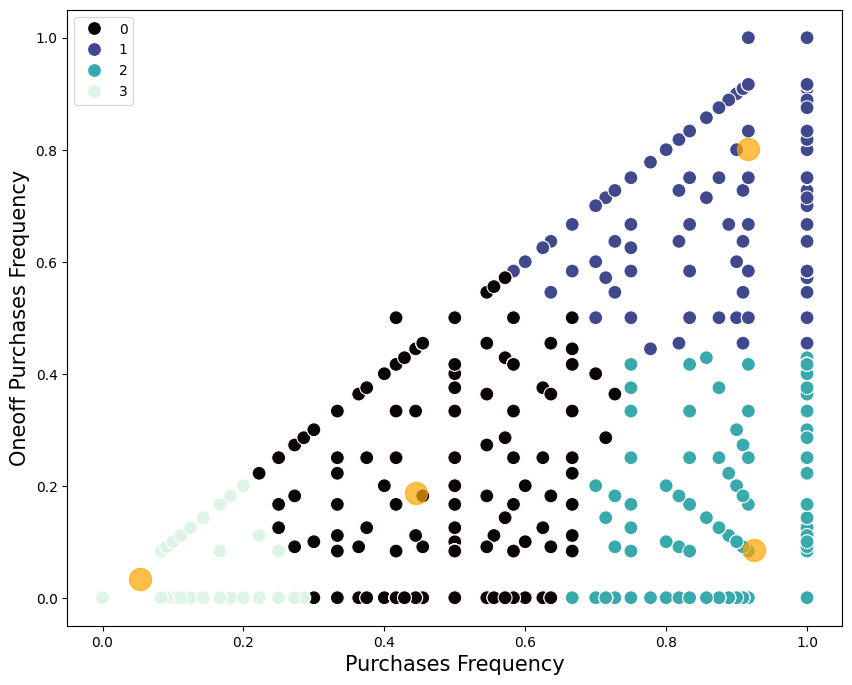

In [ ]:
plot_cluster(kmeans, X, axlabels=['Purchases Frequency', 'Oneoff Purchases Frequency'])

Nel grafico sono presenti 4 cluster, per il **cluster 2** si registra un'elevata frequenza di acquisti, ma bassa frequenza di pagamento in un'unica soluzione: potrebbe essere utile incentivare questi clienti andando a facilitare i pagamenti attraverso app, processi di checkout semplificati o memorizzazione dei dati.

Il **cluster 3** registra bassi valori di entrambe le frequenze: in tal caso può essere vantaggioso raccogliere feedback direttamente dai clienti per comprendere meglio le loro esigenze e attuare le strategie più adatte.

In [ ]:
df_cluster = to_cluster(X)
df_cluster.to_excel("oneoff_purchases_frequency.xlsx")